In [1]:
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Q 1

We will preprocess the data and extract the data we want, according to the following sentence:

- **Score lead**. We believe that the difference in scores in the current game will significantly affect the player's mentality and indirectly affect the player's cash flow.

- **Stamina**. In the provided data set, we can measure the player's current physical strength through the distance traveled by the player.
- **Score streak**. We believe that whether consecutive points are scored in a game is also an important factor affecting a player's performance.
- **Mentality**. Losing points due to certain things during the game will affect the performance of the players, thereby indirectly affecting the performance.

Therefore, we will process the original data to obtain the following **evaluation indicators**:

|     evaluation indicators      |      Lable      |
| :----------------------------: | :-------------: |
|           Score lead           |   points_diff   |
| Running distance in this match | total_distance  |
|          Score streak          |  points_streak  |
|         unforced error         |     unf_err     |
|        Whether to serve        |     server      |
|     serve score(untouched)     |   serve_score   |
|      Last round duration       | elapsed_time_td |
|                                |                 |

In [18]:
path = 'E:\MEM-Problem-C\data\data_processed.csv'
dataset = pd.read_csv(path)
data = dataset
dataset

,match_id,p1_diffp,p1_distance_run,p1_win_streak,p1_unf_err,p1_serve,p1_ace,elapsed_time,p1_label
0,0,0,6.000,0,1,1,0,0,0
1,0,-1,5.253,0,0,1,0,38,1
2,0,0,13.800,1,1,1,0,23,0
3,0,-1,51.108,0,0,1,0,30,1
4,0,0,0.649,1,0,1,1,50,1
...,...,...,...,...,...,...,...,...,...
7279,30,-1,38.620,0,0,1,0,27,1
7280,30,0,17.533,1,0,1,0,45,1
7281,30,1,10.882,2,0,1,0,37,0
7282,30,0,7.893,0,0,1,0,32,1


In [12]:
import openpyxl
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = dataset.columns[:-1]
scaler.fit(dataset[columns].values)
dataset[columns] = scaler.transform(dataset[columns].values)
dataset.to_excel('tar_data.xlsx',index=False)

![image-20240203013357618](C:\Users\40633\AppData\Roaming\Typora\typora-user-images\image-20240203013357618.png)

In [13]:
import warnings
warnings.filterwarnings("ignore")

def function(model):
    auc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='roc_auc').mean(),2)
    acc = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='accuracy').mean(),2)
    recall = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='recall').mean(),2)
    precision = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='precision').mean(),2)
    f1 = round(cross_val_score(model,dataset[columns].values,dataset['p1_label'].values, cv=5,scoring='f1').mean(),2)
    return acc,recall,precision,f1,auc

model = LGBMClassifier(random_state=30,force_col_wise=True)
print(f'LGBMClassifier acc,recall,precision,f1,auc :{function(model)}')
model = XGBClassifier(random_state=50)
print(f'XGBClassifier acc,recall,precision,f1,auc :{function(model)}')
model = SVC(random_state=50)
print(f'SVC acc,recall,precision,f1,auc :{function(model)}')
model = MLPClassifier(random_state=60)
print(f'MLPClassifier acc,recall,precision,f1,auc :{function(model)}')
model = LogisticRegression(random_state=50)
print(f'LogisticRegression acc,recall,precision,f1,auc :{function(model)}')

[LightGBM] [Info] Number of positive: 2975, number of negative: 2852
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510554 -> initscore=0.042224
[LightGBM] [Info] Start training from score 0.042224
[LightGBM] [Info] Number of positive: 2974, number of negative: 2853
[LightGBM] [Info] Total Bins 455
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510383 -> initscore=0.041537
[LightGBM] [Info] Start training from score 0.041537
[LightGBM] [Info] Number of positive: 2974, number of negative: 2853
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510383 -> initscore=0.041537
[LightGBM] [Info] Start training from score 0.041537
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 2991, number of negative: 2836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 5827, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513300 -> initscore=0.053213
[LightGBM] [Info] Start training from score 0.053213


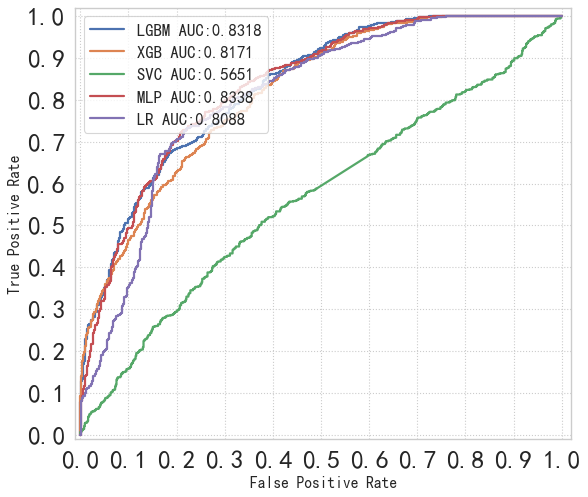

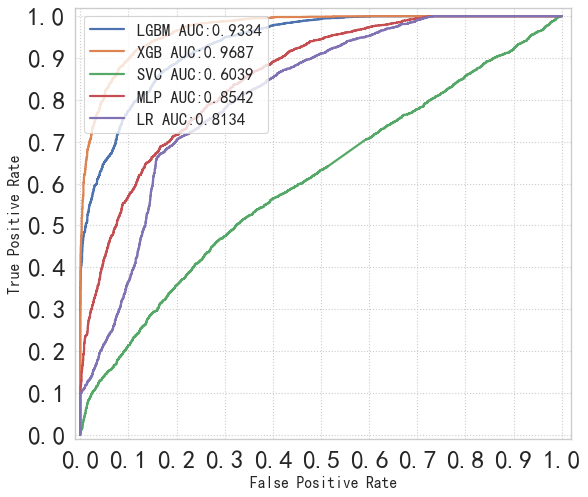

In [24]:
import numpy as np
from  sklearn import metrics
def f(model_list,name_list,types='train'):
    plt.figure(figsize=(8, 7), dpi=80, facecolor='w')    # dpi:每英寸长度的像素点数；facecolor 背景颜色
    plt.xlim((-0.01, 1.02))  # x,y 轴刻度的范围
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))  #绘制刻度
    plt.yticks(np.arange(0, 1.1, 0.1))

    if types == 'test':
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xvalid)[:,1]
            fpr, tpr, _ = metrics.roc_curve(yvalid, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '-', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    else:
        for model,name in zip(model_list,name_list):
            ytest_prob = model.predict_proba(xtrain)[:,1]
            fpr, tpr, _ = metrics.roc_curve(ytrain, ytest_prob)
            auc = metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr, '-', lw=2, label=f'{name} AUC:%.4f' % auc)  # 绘制AUC 曲线
    plt.legend(loc='upper left',fontsize=15)    # 设置显示标签的位置
    plt.xlabel('False Positive Rate', fontsize=14)   #绘制x,y 坐标轴对应的标签
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.tick_params(labelsize=23)

    plt.grid(True, ls=':')  # 绘制网格作为底板;b是否显示网格线；ls表示line style
    plt.savefig(f'results\\roc_auc({types}).png',dpi=500)
    plt.show()


xtrain, xvalid, ytrain, yvalid = train_test_split(dataset[columns].values,dataset['p1_label'].values,random_state=620,test_size=0.2)

model1 = LGBMClassifier(random_state=30)
model2 = XGBClassifier(random_state=50)
model3 = SVC(probability=True,random_state=50)
model4 = MLPClassifier(random_state=60)
model5 = LogisticRegression(random_state=50)

model1.fit(xtrain,ytrain)
model2.fit(xtrain,ytrain)
model3.fit(xtrain,ytrain)
model4.fit(xtrain,ytrain)
model5.fit(xtrain,ytrain)


f([model1,model2,model3,model4,model5],['LGBM','XGB','SVC','MLP','LR'],'test')
f([model1,model2,model3,model4,model5],['LGBM','XGB','SVC','MLP','LR'],'train')

In [22]:
index = data[data.match_id==6].reset_index(drop=True).index
test = dataset.iloc[index]
print(index)
train = dataset.drop(index,axis=0)
model = LGBMClassifier(random_state=30)
model.fit(train[columns].values,train['p1_label'].values)
pred = model.predict_proba(test[columns].values)
pred = pd.DataFrame({'score':pred[:,0]})

RangeIndex(start=0, stop=232, step=1)
[LightGBM] [Info] Number of positive: 3599, number of negative: 3453
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 7052, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510352 -> initscore=0.041413
[LightGBM] [Info] Start training from score 0.041413


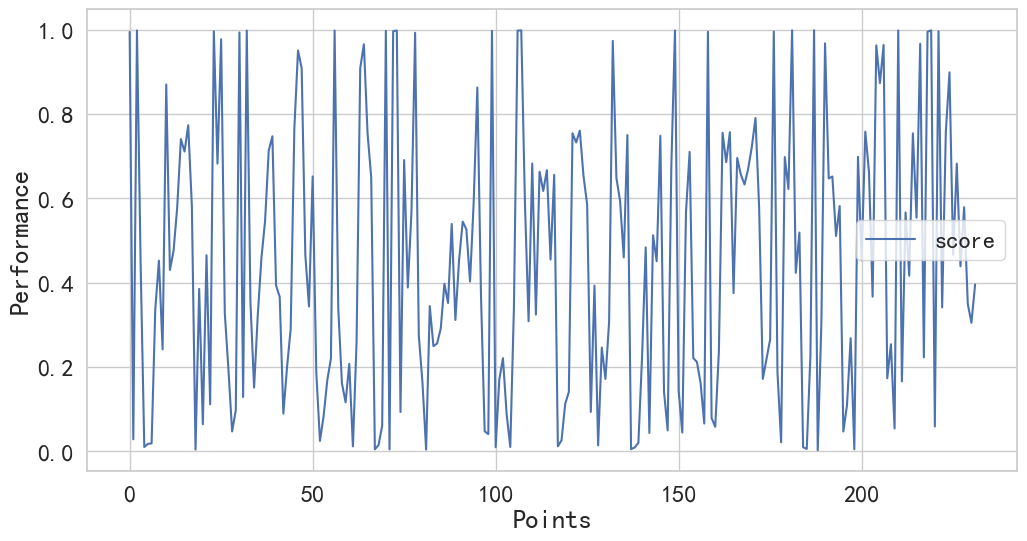

In [23]:
import seaborn as sns
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
import matplotlib.pyplot as plt
import plotly.express as px

#不同蔬菜品类的数量分布
pred.plot(kind = "line",figsize = (12,6)) #颜色,matplotlib
plt.xticks(rotation=0)
plt.xlabel("Points")
plt.ylabel("Performance")
plt.savefig('results\\match_flow.png',dpi=500)
plt.show()